In [1]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load the Dataset
df = pd.read_csv('synthetic_online_retail_data.csv')

df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


# Data Cleaning

In [4]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

In [5]:
#Drop the null values.
df.dropna(inplace = True)

df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Analysis

In [9]:
#1. Find out all the records of Category Name and Product Name where Gender is "Female".
df[df['gender'].str.strip().str.lower() == 'f'][['gender' , 'category_name' , 'product_name']].head(10)

,gender,category_name,product_name
0,F,Electronics,Smartphone
2,F,Sports & Outdoors,Tent
4,F,Fashion,Skirt
5,F,Electronics,Smartphone
8,F,Home & Living,Pillow
9,F,Home & Living,Blanket
15,F,Fashion,Shirt
19,F,Electronics,Smartphone
21,F,Home & Living,Carpet
31,F,Fashion,Dress


In [10]:
#2. Find out the total number of male and female.
df['gender'].value_counts()

M    365
F    356
Name: gender, dtype: int64

In [11]:
#3. Find out the records of City where Gender is "Male".
df[df['gender'].str.strip().str.lower() == 'm'][['gender', 'city']].head(10)

,gender,city
3,M,Hernandezburgh
10,M,Elizabethmouth
11,M,Melanieberg
12,M,Allisonland
13,M,Myershaven
14,M,South Tonya
16,M,Levyport
17,M,Fullerland
22,M,Port Danielleview
24,M,Douglasport


In [13]:
#4. Find out the records of Product Name paid through 'Cash on Delivery'
product_name = df[df['payment_method'] == 'Cash on Delivery']['product_name'].nunique()

print(f"The Total number of Products Payment method is done in: 'Cash on Delivery': {product_name}")

The Total number of Products Payment method is done in: 'Cash on Delivery': 25


# Data Visualization

In [14]:
df.columns

Index(['customer_id', 'order_date', 'product_id', 'category_id',
       'category_name', 'product_name', 'quantity', 'price', 'payment_method',
       'city', 'review_score', 'gender', 'age'],
      dtype='object')

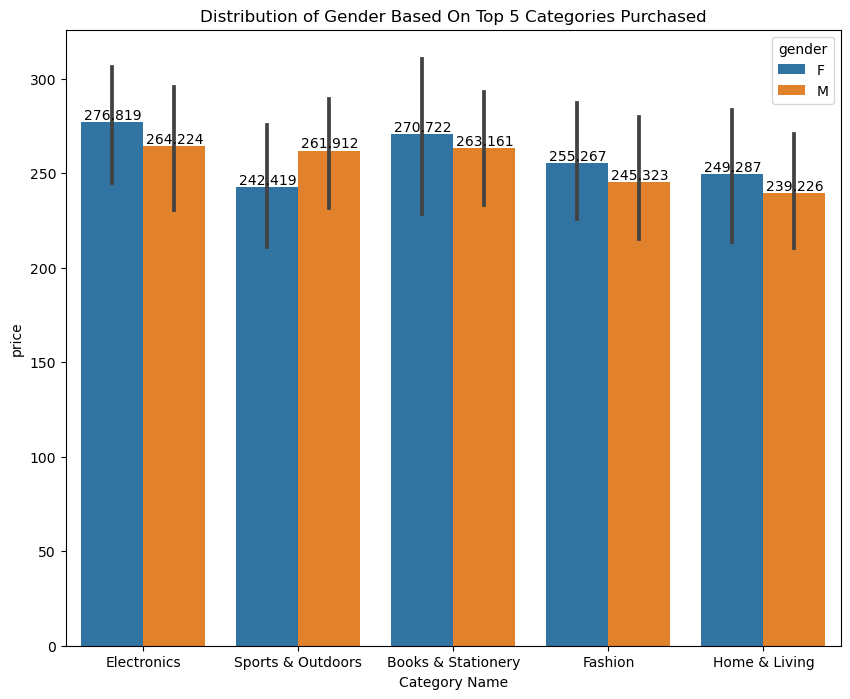

In [23]:
#1. Find out the Top 5 categories names purchased by both the genders.
plt.figure(figsize = (10,8))
ax = sns.barplot(x = 'category_name' , y = 'price' , data = df , hue = 'gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Category Name')
plt.title('Distribution of Gender Based On Top 5 Categories Purchased')
plt.show()

In the above graph, the categories which is mostly purchased by Male and Female is "Electronics" than other 4 Products.

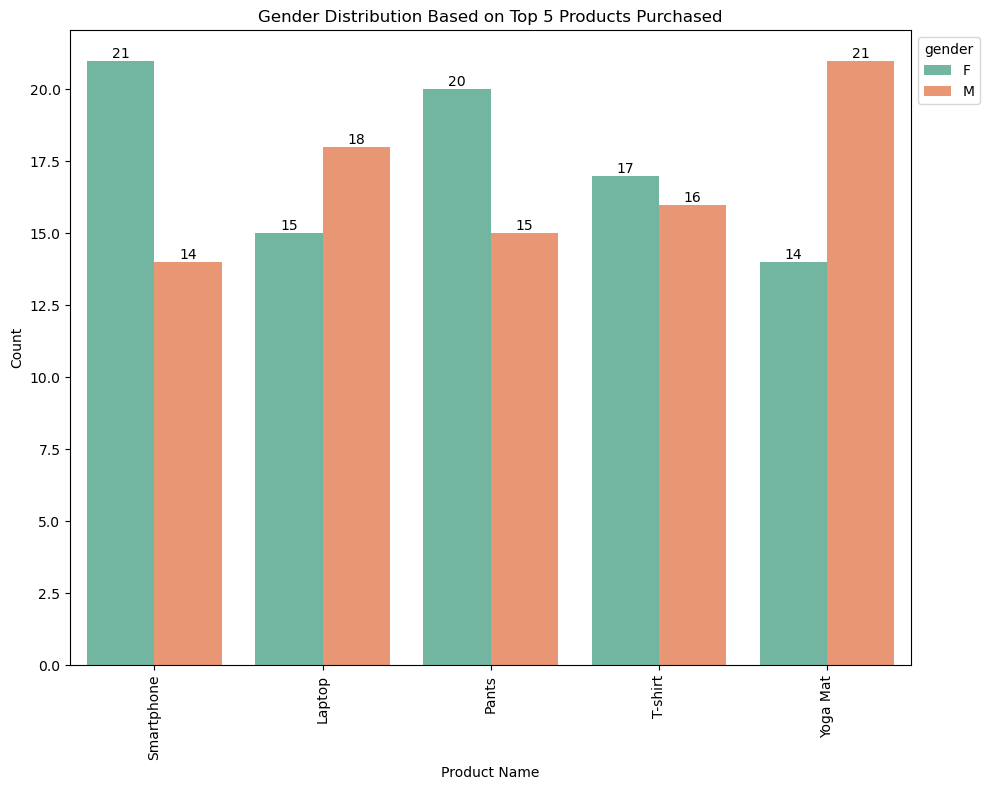

In [54]:
#2. Find out the Top 5 product names purchased by both the genders.
top5 = df['product_name'].value_counts().nlargest(5).index
df_top5 = df[df['product_name'].isin(top5)]

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='product_name', data=df_top5, hue='gender', palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Gender Distribution Based on Top 5 Products Purchased')
plt.xticks(rotation=90)
plt.legend(title = 'gender' , bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

In the above graph, the products which is mostly purchased by Male and Female is "Smartphone" , "Pants" and "Yoga Mat" than other 2 Products.

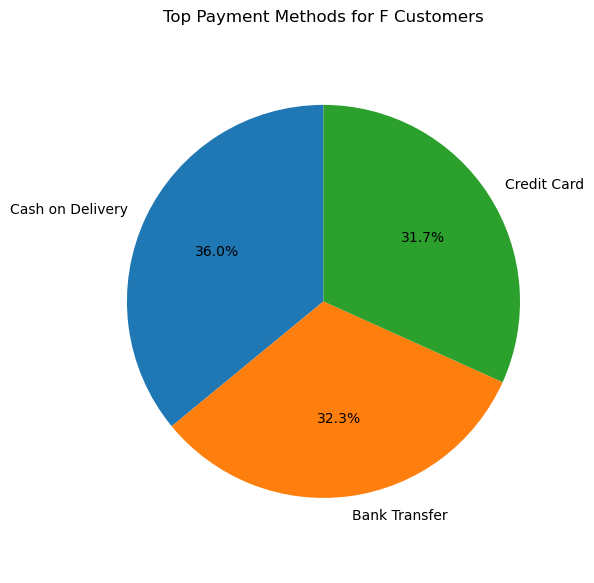

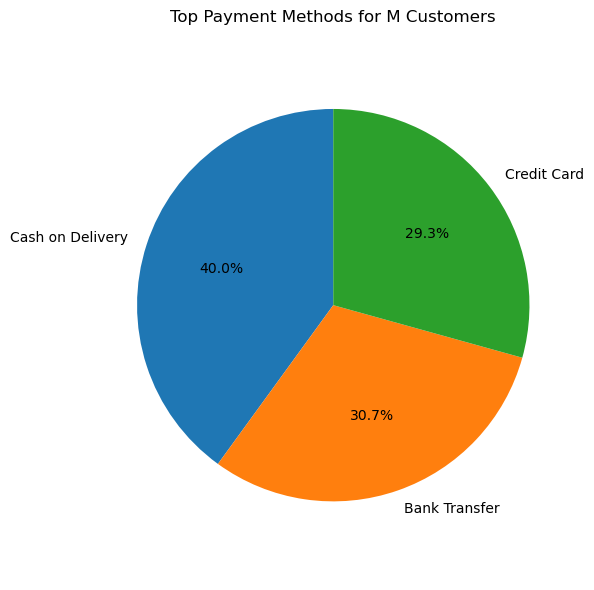

In [39]:
#3. Find the Top Payment Methods Done by male(M) and female(F).
for gender in ['f', 'm']:
    top5 = df[df['gender'].str.strip().str.lower() == gender]['payment_method'].dropna().value_counts().head(5)
    plt.figure(figsize=(6,6))
    plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top Payment Methods for {gender.upper()} Customers')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In the above pie charts, the Male and female do most of the transaction in "Cash On Delivery" than "Bank Transfer" and "Credit Card".

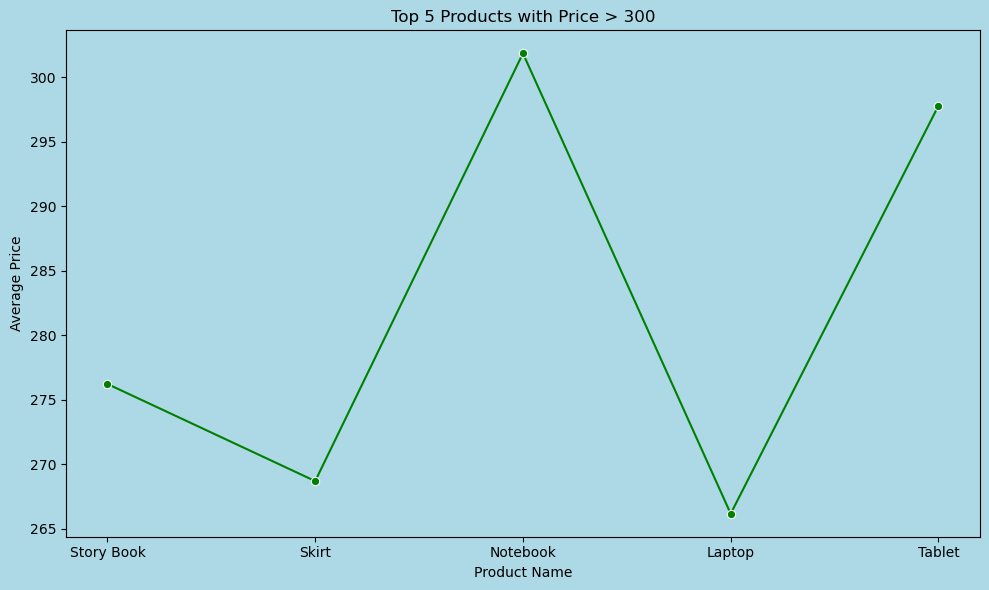

In [53]:
#4. Find the Top 5 Products with Prices above 300.
top5 = df[df['price'] > 400]['product_name'].value_counts().nlargest(5).index
df_top5 = df[df['product_name'].isin(top5)]

plt.figure(figsize=(10, 6), facecolor='lightblue')
sns.lineplot(data=df_top5, x='product_name', y='price', estimator='mean', marker='o', errorbar=None, color = 'Green')
plt.title('Top 5 Products with Price > 300')
plt.gca().set_facecolor('lightblue')
plt.xlabel('Product Name')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In the above line graph, the the Notebook Product Name has the highest average price among the top 5 products priced over 300.

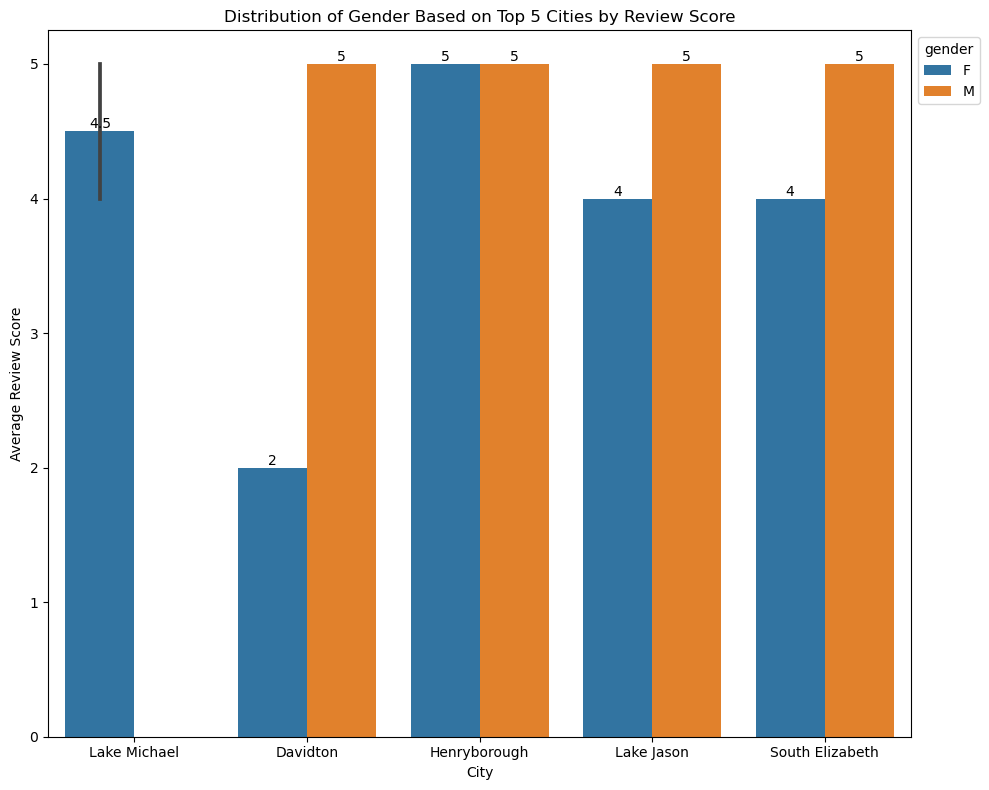

In [44]:
#5. Find the ditribution of gender in Top 5 Cities By Review Score.
top5 = df['city'].value_counts().nlargest(5).index
df_top5 = df[df['city'].isin(top5)]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='city', y='review_score', data=df_top5, hue='gender', estimator='mean')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('City')
plt.ylabel('Average Review Score')
plt.title('Distribution of Gender Based on Top 5 Cities by Review Score')
plt.legend(title = 'gender' , bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

# Conclusion

In the above graph, the Henryborough City has the highest review score of both genders than other 4 cities.

Thank You!